In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:

df_sensor = pd.read_csv("datasets/assignTTSWING_sensor_only.csv")
X = df_sensor.drop(columns=['playYears'])
y = df_sensor['playYears']
classes = np.unique(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:

ada_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ada', AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1, class_weight='balanced'),
        random_state=42
    ))
])


In [ ]:

ada_param_grid = {
    'ada__n_estimators': [50, 100],
    'ada__learning_rate': [0.1, 1.0]
}

In [ ]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

ada_grid_search = GridSearchCV(
    estimator=ada_pipeline,
    param_grid=ada_param_grid,
    cv=cv,
    scoring='f1_macro',
    n_jobs=-1,
    return_train_score=True
)

In [ ]:

ada_grid_search.fit(X_train, y_train)


print("\n=== AdaBoost Results ===")
print("Best Parameters:", ada_grid_search.best_params_)
print(f"Best F1 Score (CV Avg): {ada_grid_search.best_score_:.4f}")


y_pred_ada = ada_grid_search.predict(X_test)
print("\nClassification Report (AdaBoost on Test Set):\n", classification_report(y_test, y_pred_ada))



=== AdaBoost Results ===
Best Parameters: {'ada__learning_rate': 1.0, 'ada__n_estimators': 100}
Best F1 Score (CV Avg): 0.4942

Classification Report (AdaBoost on Test Set):
               precision    recall  f1-score   support

         0.0       0.50      0.20      0.29      3738
         1.0       0.61      0.84      0.71      9432
         2.0       0.57      0.41      0.47      4251

    accuracy                           0.60     17421
   macro avg       0.56      0.48      0.49     17421
weighted avg       0.58      0.60      0.56     17421



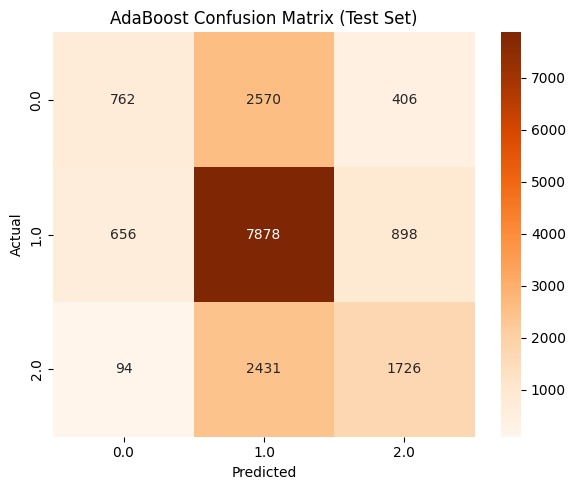

In [10]:
ada_cm = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(6, 5))
sns.heatmap(ada_cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=classes, yticklabels=classes)
plt.title("AdaBoost Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [11]:
# # === Plot AdaBoost learning curve ===
# train_sizes, train_scores, val_scores = learning_curve(
#     ada_grid_search.best_estimator_, X, y, cv=5, scoring='f1_macro',
#     train_sizes=np.linspace(0.1, 1.0, 5)
# )

# plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
# plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation')
# plt.xlabel("Training Size")
# plt.ylabel("F1 Score")
# plt.title("AdaBoost Learning Curve")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

<Figure size 1000x600 with 0 Axes>

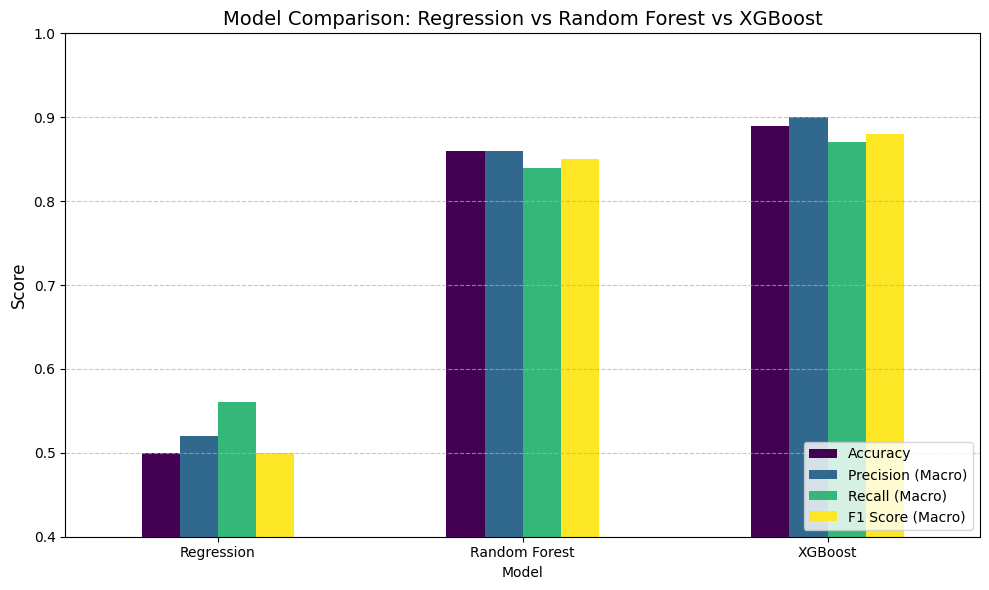

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


data = {
    'Model': ['Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.50, 0.86, 0.89],
    'Precision (Macro)': [0.52, 0.86, 0.90],
    'Recall (Macro)': [0.56, 0.84, 0.87],
    'F1 Score (Macro)': [0.50, 0.85, 0.88]
}

df = pd.DataFrame(data)
df.set_index('Model', inplace=True)

# Plot
plt.figure(figsize=(10, 6))
df.plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.title("Model Comparison: Regression vs Random Forest vs XGBoost", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.ylim(0.4, 1.0)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
